 # Tema :  Clustering
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : DBSCAN \\
  Termina      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: Javier Olivares (%)
 - Integrante 2: Jose Huamani (%)
 - Integrante 3: Nicolas Stigler (%)
 - Integrante 4: Sergio Delgado (%)


 ----


**Note: You may use previous codes from other exercises to read images from the database or to display images.**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from sklearn.neighbors import KDTree

# 1. DBSCAN:
- Input:  
  - Data : La Data  a ser agrupada
  - radio : Rádio de la hiperesfera
  - vecinos_min : Número mínimo de vecinos para ser condiderado cluster.
- Ouput: Vector con las etiquetas de cada elemento de la data.


link de la base de datos: [Aquí](https://drive.google.com/file/d/1KHVUORFr4TcI-4xUXLIlEBxxPS7d5zjQ/view?usp=sharing)

In [2]:
# kd tree (nlogn) para que sea mas rapido :3 a comparacion de crear una matriz (n^2)
def DBSCAN(ds,radio,vecinos_min):
  if hasattr(ds, 'values'):
    all_data = ds.values
  else:
    all_data = ds

  if all_data.shape[1] > 2:
    features = all_data[:, 2:]
  else:
    print("Se subio mal la data (2 o menos columnas)")
    features = all_data

  n_points = features.shape[0]

  kdtree = KDTree(features, metric='euclidean')

  labels = np.zeros(n_points, dtype=int)
  cluster_id = 0

  for i in range(n_points):
    if labels[i] != 0:
      continue

    neighbor_indices = kdtree.query_radius(features[i:i+1], r=radio)[0]

    if len(neighbor_indices) < vecinos_min:
      labels[i] = -1
    else:
      cluster_id += 1
      labels[i] = cluster_id

      seed_set = deque([idx for idx in neighbor_indices if idx != 1])

      while seed_set:
        q_index = seed_set.popleft()
        if labels[q_index] == -1 or labels[q_index] == 0:
          labels[q_index] = cluster_id
          q_neighbor_indices = kdtree.query_radius(features[q_index:q_index+1], r=radio)[0]
          if len(q_neighbor_indices) >= vecinos_min:
            for neighbor_idx in q_neighbor_indices:
              if labels[neighbor_idx] == 0 or labels[neighbor_idx] == -1:
                seed_set.append(neighbor_idx)
  return labels

# Image hidden information
The database contains hidden information. Some hints are:

- The first two columns in tha dataset "Misterio" indicate the row and column in an image.
- After applying the clustering algorithm and obtaining the labels, you will be able to plot the message where each letter should appear in a different color.

In [3]:
import os

if not os.path.exists('data'):
    os.makedirs('data')
    print("Carpeta 'data/' creada.")
    print("Por favor descarga 'misterio.csv' desde Google Drive y colócalo en la carpeta 'data/'")

path = 'data/'

if os.path.exists(path + 'misterio.csv'):
    print("✓ Archivo misterio.csv encontrado!")
else:
    print("⚠ Archivo misterio.csv NO encontrado.")
    print(f"   Por favor coloca el archivo en: {os.path.abspath(path)}")

✓ Archivo misterio.csv encontrado!


# Deciphering the information with DBSCAN
Read the dataset stored in the file "misterio.csv", and then run your **DBSCAN** algorithm. You should look for good parameters for radius and nearest neighbors to achieve better results.

[DBSCAN Library](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [4]:
import pandas as pd

dataset = pd.read_csv(path + 'misterio.csv', header=None)
labels = DBSCAN(dataset,2,5)

# Show Result
Implement the function show_image that receives the dataset (coordinates i, j) and the labels, which will be the colors used to paint each cluster



In [5]:
def Show_Image(dataset, labels):
  if hasattr(dataset, 'values'):
    data = dataset.values
  else:
    data = dataset

  x_coords = data[:, 1]
  y_coords = data[:, 0]

  plt.style.use('dark_background')
  plt.figure(figsize=(12, 12))
  plt.scatter(x_coords, y_coords, c=labels, cmap=plt.cm.jet, s=2, vmin=-1)
  plt.gca().invert_yaxis()
  plt.axis('equal')

  plt.title('DBSCAN Result')
  plt.xlabel('Column')
  plt.ylabel('Row')
  plt.show()

#**One learns by doing things and having fun along the way**🚀🚀

#Good Luck😊😊

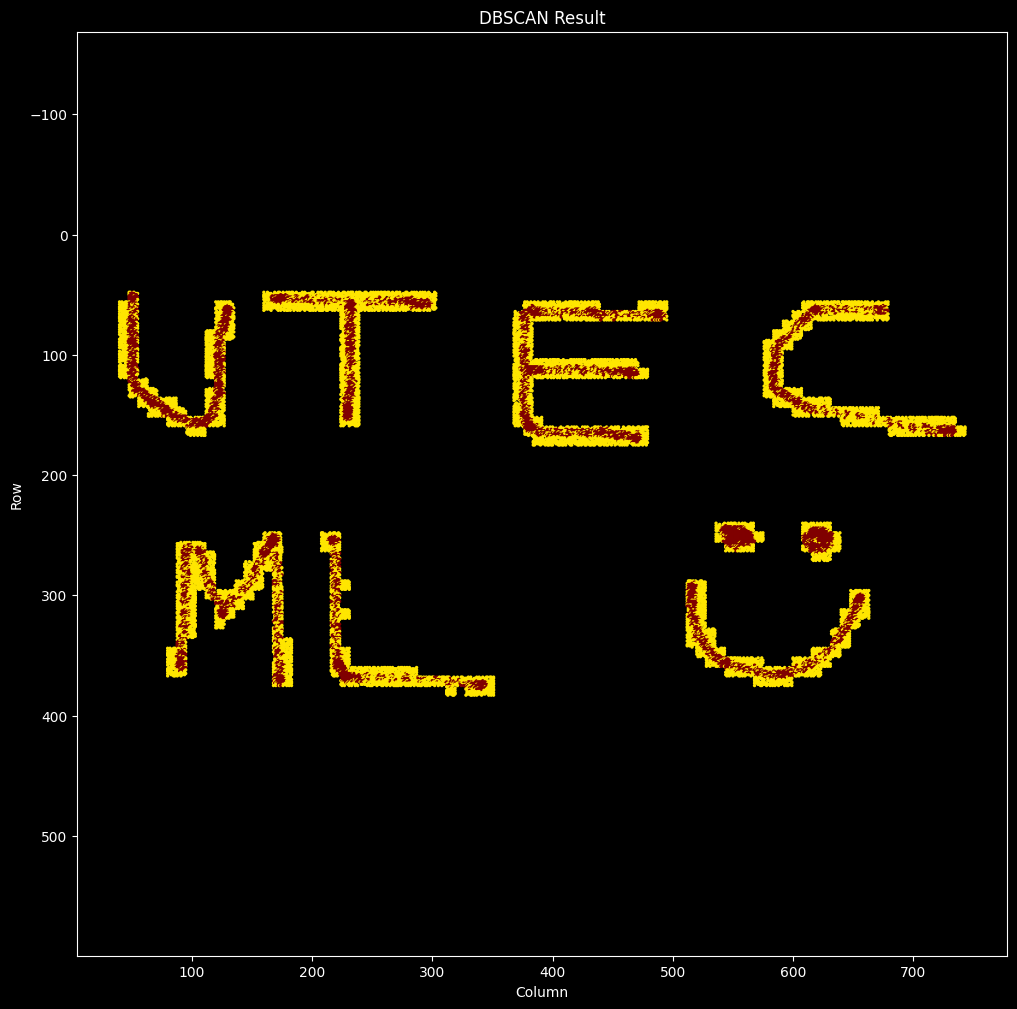

In [6]:
Show_Image(dataset, labels)